(512, 512)


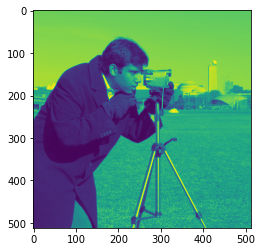

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load an image from skimage.data
image = data.camera()
print(image.shape)
# Compute the SVD of the image
U, S, Vh = np.linalg.svd(image, full_matrices=False)
plt.imshow(image)

(303, 384)


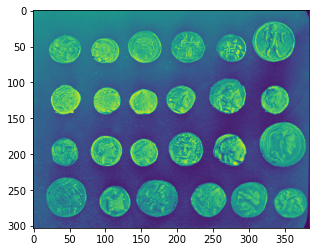

In [38]:
# Load another image from skimage.data
image2 = data.coins()
print(image2.shape)
# Compute the SVD of the image
U2, S2, Vh2 = np.linalg.svd(image2, full_matrices=False)
plt.imshow(image2)

In [39]:
# Function to reconstruct image from k singular values
def reconstruct_image(U, S, Vh, k):
    return np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vh[:k, :]))


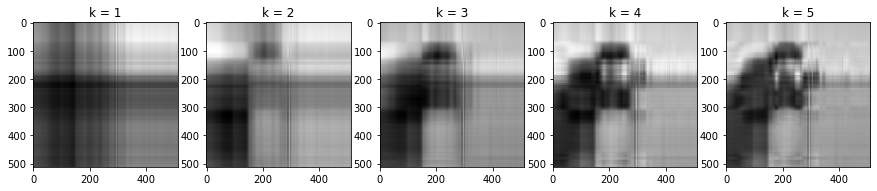

In [40]:
# Visualize dyads
k_visualize = 5  # Number of dyads to visualize
fig, axs = plt.subplots(1, k_visualize, figsize=(15, 5))
for i in range(k_visualize):
    axs[i].imshow(reconstruct_image(U, S, Vh, i+1), cmap='gray')
    axs[i].set_title(f'k = {i+1}')
plt.show()




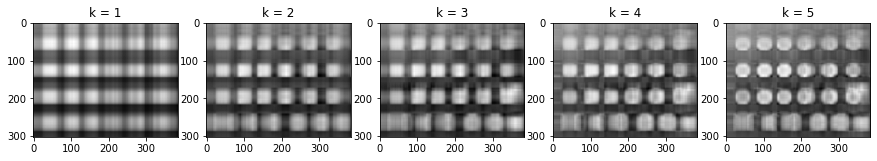

In [41]:
k_visualize = 5  # Number of dyads to visualize
fig, axs = plt.subplots(1, k_visualize, figsize=(15, 5))
for i in range(k_visualize):
    axs[i].imshow(reconstruct_image(U2, S2, Vh2, i+1), cmap='gray')
    axs[i].set_title(f'k = {i+1}')
plt.show()


##### Visualizing the dyads in the context of image compression using SVD allows us to see the contribution of each singular value and its associated vectors to the overall image. The dyads represent components of the original image that, when combined, reconstruct the entire image. The singular values indicate the importance or significance of each dyad in capturing the image's information. in conclusion from results: a) it seams that each dyad_i contain specific information. by using the first 5 of them we practicaly construct the approximation of the orginal picture. b) in k=1 the information is just the intensity of pixels with black repeated in whole row and columns. c) with k=2 some of noises get removed from non relevant cell of the matrix. d) in k=3 the same thing happen in k=2 with more power
#### so basically by increasing k more precision added and less number of cells contain repeated information of cell with color and thats why with k=4 and k=5 we can guess the picture more easily

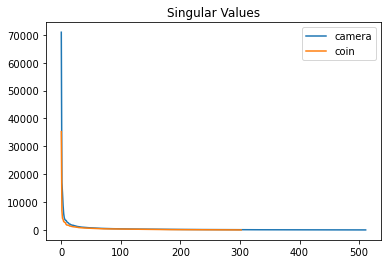

In [42]:
# Plot singular values
plt.figure()
plt.plot(S, label= 'camera')
plt.plot(S2, label= 'coin')
plt.title('Singular Values')
plt.legend()
plt.show()


##### singular values decline in their values after ~25 which can suggets that after around 25th singular value, the singular vectors doesnt hold much information (or the rank of the matrix is around that number) and have very small influence (or non) on the A(or X) and thats why they have very small (or 0) singular values too

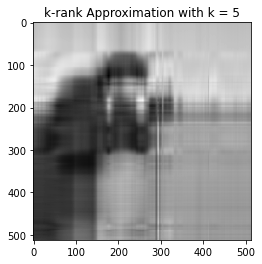

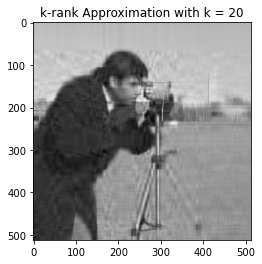

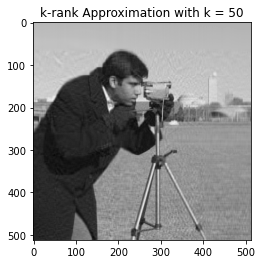

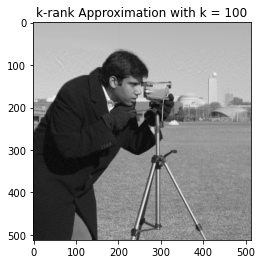

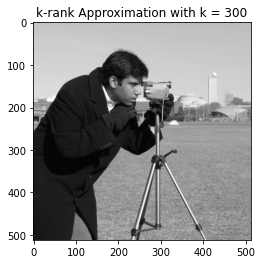

In [43]:
# k-rank approximation visualization and error calculation
k_values = [5, 20, 50, 100, 300]  # Different k values for approximation
errors = []
compression_factors = []
for k in k_values:
    approx_image = reconstruct_image(U, S, Vh, k)
    error = np.linalg.norm(image - approx_image, 'fro')
    errors.append(error)
    compression_factor = 1 - (k * (image.shape[0] + image.shape[1] + 1)) / (image.shape[0] * image.shape[1])
    compression_factors.append(compression_factor)

    # Visualize approximation
    plt.figure()
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'k-rank Approximation with k = {k}')
    plt.show()


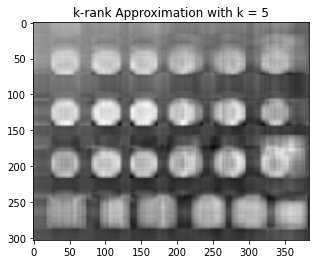

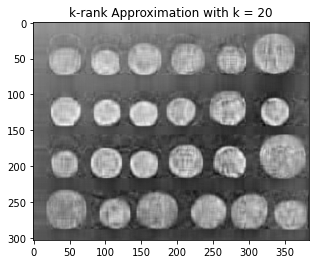

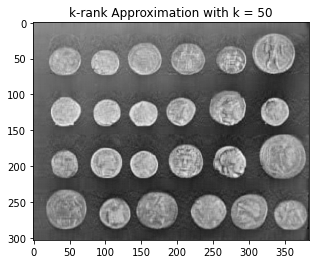

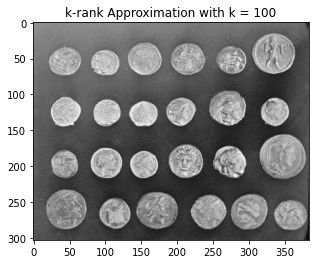

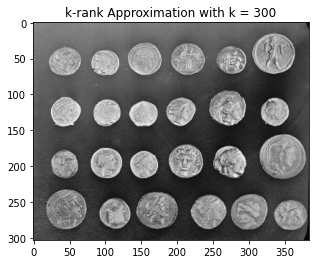

In [44]:
# k-rank approximation visualization and error calculation
k_values = [5, 20, 50, 100, 300]  # Different k values for approximation
errors2 = []
compression_factors2 = []
for k in k_values:
    approx_image = reconstruct_image(U2, S2, Vh2, k)
    error = np.linalg.norm(image2 - approx_image, 'fro')
    errors2.append(error)
    compression_factor = 1 - (k * (image2.shape[0] + image2.shape[1] + 1)) / (image2.shape[0] * image2.shape[1])
    compression_factors2.append(compression_factor)

    # Visualize approximation
    plt.figure()
    plt.imshow(approx_image, cmap='gray')
    plt.title(f'k-rank Approximation with k = {k}')
    plt.show()


##### with k=5 we inferred the idea of our orginal picture already, although it is not the perfect pivture
##### with k=20 we inferred the perfect image of our orginal photo, but there are some noises invlove
##### with k=50 & 100 & 300 the shape doesnt change at all in comparison with k=20 however the intencity of cell became sharper and thats why we get less blury image 

question: Consider two different images. What do you observe if you compare the 
 rank approximation of an image 
 for increasing values of 
? Is there a relationship between the meaningfulness of the dyad of 
 for a given 
 and the value of the associated singular value? What do you observe if you plot the approximation error  compared with the plot of, for increasing values of ?
 
 ::: basically the trend of singular values is to get close to 0 around ~100 thats the observation from singular value plots. The observation for k-rank approximation which is after k=100 the k-rank recunstruction doesn't change that much. hence, these two observation shows a relation, which is when the singular value is very small, nothing specific would add to k-rank approximation.

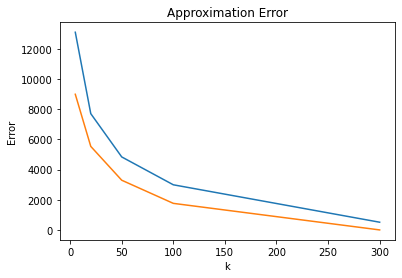

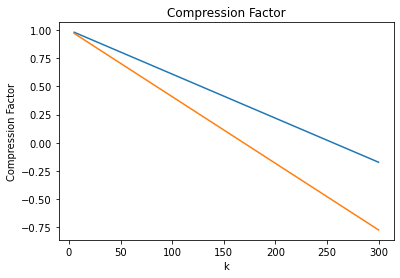

In [45]:
# Plot approximation error
plt.figure()
plt.plot(k_values, errors, label= 'camera')
plt.plot(k_values, errors2, label='coin')
plt.title('Approximation Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

# Plot compression factor
plt.figure()
plt.plot(k_values, compression_factors, label= 'camera')
plt.plot(k_values, compression_factors2, label= 'coin')
plt.title('Compression Factor')
plt.xlabel('k')
plt.ylabel('Compression Factor')
plt.show()



#### obviously with increasing k error will reduce 

question: What do you observe if you plot the approximation error compared with the plot of , for increasing values of ?

::: around the k=~100 the error became fifth time smaller so 80% of error would disappear.

question: onsider an image  and let  be the -rank approximation of . What is the compression factor ? What is its behavior for increasing values of ? How does it relates with the visual quality of the image ?

::: it measures the reduction in the number of parameters needed to represent the matrix X with a rank-k approximation using Singular Value Decomposition. The compression factor c_k gives the fraction of information retained in the compressed representation compared to the original. as it  was mentioned before it has decreasing behavior. in k=~100 the compression factor became very close to 0 same as the error and visual quality test we run before. 

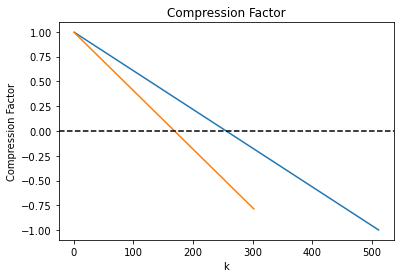

Value of k when compression factor is 0: 256
Value of k when compression factor is 0: 170
The error when compression factor is 0: 802.8072225207685 while max error was 27423.03561369393
The error when compression factor is 0: 1707.113991542886 while max error was 13054.0316990262


In [53]:
def calculate_compression_factor(k, m, n):
    return 1 - (k * (m + n + 1)) / (m * n)

# Plot compression factor and find k when compression factor is 0
k_values = list(range(1, min(image.shape)))
compression_factors = []

for k in k_values:
    compression_factor = calculate_compression_factor(k, image.shape[0], image.shape[1])
    compression_factors.append(compression_factor)

k_values2 = list(range(1, min(image2.shape)))
compression_factors2 = []

for k in k_values2:
    compression_factor2 = calculate_compression_factor(k, image2.shape[0], image2.shape[1])
    compression_factors2.append(compression_factor2)

    
# Plot compression factor
plt.plot(k_values, compression_factors[:len(k_values)], label= 'camera')  # Ensure both arrays have the same length
plt.plot(k_values2, compression_factors2[:len(k_values2)], label= 'coin')  # Ensure both arrays have the same length
plt.axhline(y=0, color='black', linestyle='--', label='y=0')
plt.title('Compression Factor')
plt.xlabel('k')
plt.ylabel('Compression Factor')
plt.show()

ck0_cam, ck0_coi = np.argmax(np.array(compression_factors) <= 0) + 1, np.argmax(np.array(compression_factors2) <= 0) + 1
# Output the value of k when compression factor is 0
print(f"Value of k when compression factor is 0: {ck0_cam}")
# Output the value of k when compression factor is 0
print(f"Value of k when compression factor is 0: {ck0_coi}")


# Calculate and plot approximation error for different k values
errors = [np.linalg.norm(image - reconstruct_image(U, S, Vh, k), 'fro') for k in k_values]

# Calculate and plot approximation error for different k values
errors2 = [np.linalg.norm(image2 - reconstruct_image(U2, S2, Vh2, k), 'fro') for k in k_values2]

print(f"The error when compression factor is 0: {errors[ck0_cam]} while max error was {max(errors)}")
print(f"The error when compression factor is 0: {errors[ck0_coi]} while max error was {max(errors2)}")